In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [29]:
df.shape

(16719, 16)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [31]:
df.head(4)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [32]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [33]:
print(df.isnull().sum())
print(' \n Total Nulls:' ,df.isnull().sum().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64
 
 Total Nulls: 46716


In [34]:
rows_before_dropna = df.shape[0]

In [35]:
df = df.dropna()

print('Total Rows Deleted: ',rows_before_dropna - df.shape[0])

Total Rows Deleted:  9894


#### Arreglamos el Dtype de User_Score y Year_of_release

Creamos una función ya que vamos a 

In [36]:
def change_dtype(var, type):
    
    df[var] = df[var].astype(type)
    
    return print(var , 'is now:',df[var].dtype)
    

In [37]:
change_dtype('Year_of_Release', 'int')

Year_of_Release is now: int32


In [38]:
change_dtype('User_Score', 'float')

User_Score is now: float64


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int32  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), int32(1), object(6)
memory usage: 879.8+ KB


### Exploramos la variable Platform

Queremos crear un dashboard unicamente de productos de Playstation, Nintendo, Xbox y Microsoft

In [40]:
df['Platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

Eliminamos las 14 filas de Dreamcast ya que no nos interesan juegos de SEGA para el analisis

In [41]:
df = df.drop(df[df['Platform'] == 'DC'].index)

### Analizamos la etiqueta 'Unknown' en la columna Publisher

In [42]:
df[df['Publisher'] == 'Unknown'].count()

Name               24
Platform           24
Year_of_Release    24
Genre              24
Publisher          24
NA_Sales           24
EU_Sales           24
JP_Sales           24
Other_Sales        24
Global_Sales       24
Critic_Score       24
Critic_Count       24
User_Score         24
User_Count         24
Developer          24
Rating             24
dtype: int64

In [43]:
df[df['Publisher'] == 'Unknown'].sort_values('Critic_Score', ascending=False).head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2997,RIFT,PC,2011,Role-Playing,Unknown,0.44,0.16,0.00,0.07,0.67,84.0,59.0,7.3,561.0,Trion Worlds,T
8992,Terraria,PC,2011,Action,Unknown,0.00,0.13,0.00,0.01,0.14,83.0,29.0,8.5,1613.0,Re-Logic,T
15324,Dungeon Defenders,PC,2011,Role-Playing,Unknown,0.02,0.00,0.00,0.00,0.02,81.0,26.0,7.3,399.0,Trendy Entertainment,E10+
7912,Chibi-Robo! Park Patrol,DS,2007,Adventure,Unknown,0.00,0.00,0.19,0.00,0.19,78.0,14.0,7.5,13.0,Skip Ltd.,E
13513,Guilty Gear XX Accent Core,PS2,2007,Fighting,Unknown,0.00,0.00,0.04,0.00,0.04,77.0,9.0,8.3,16.0,Arc System Works,T


Hay juegos con buenas puntuaciones así que decidimos dejar estos datos

### Comprobamos posibles Outliers en las variables numericas

In [44]:
var_num = df.select_dtypes('number')
var_num

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
2,2008,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,2009,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
6,2006,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0
7,2006,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0
...,...,...,...,...,...,...,...,...,...,...
16667,2001,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0
16677,2002,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0
16696,2014,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0
16700,2011,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0


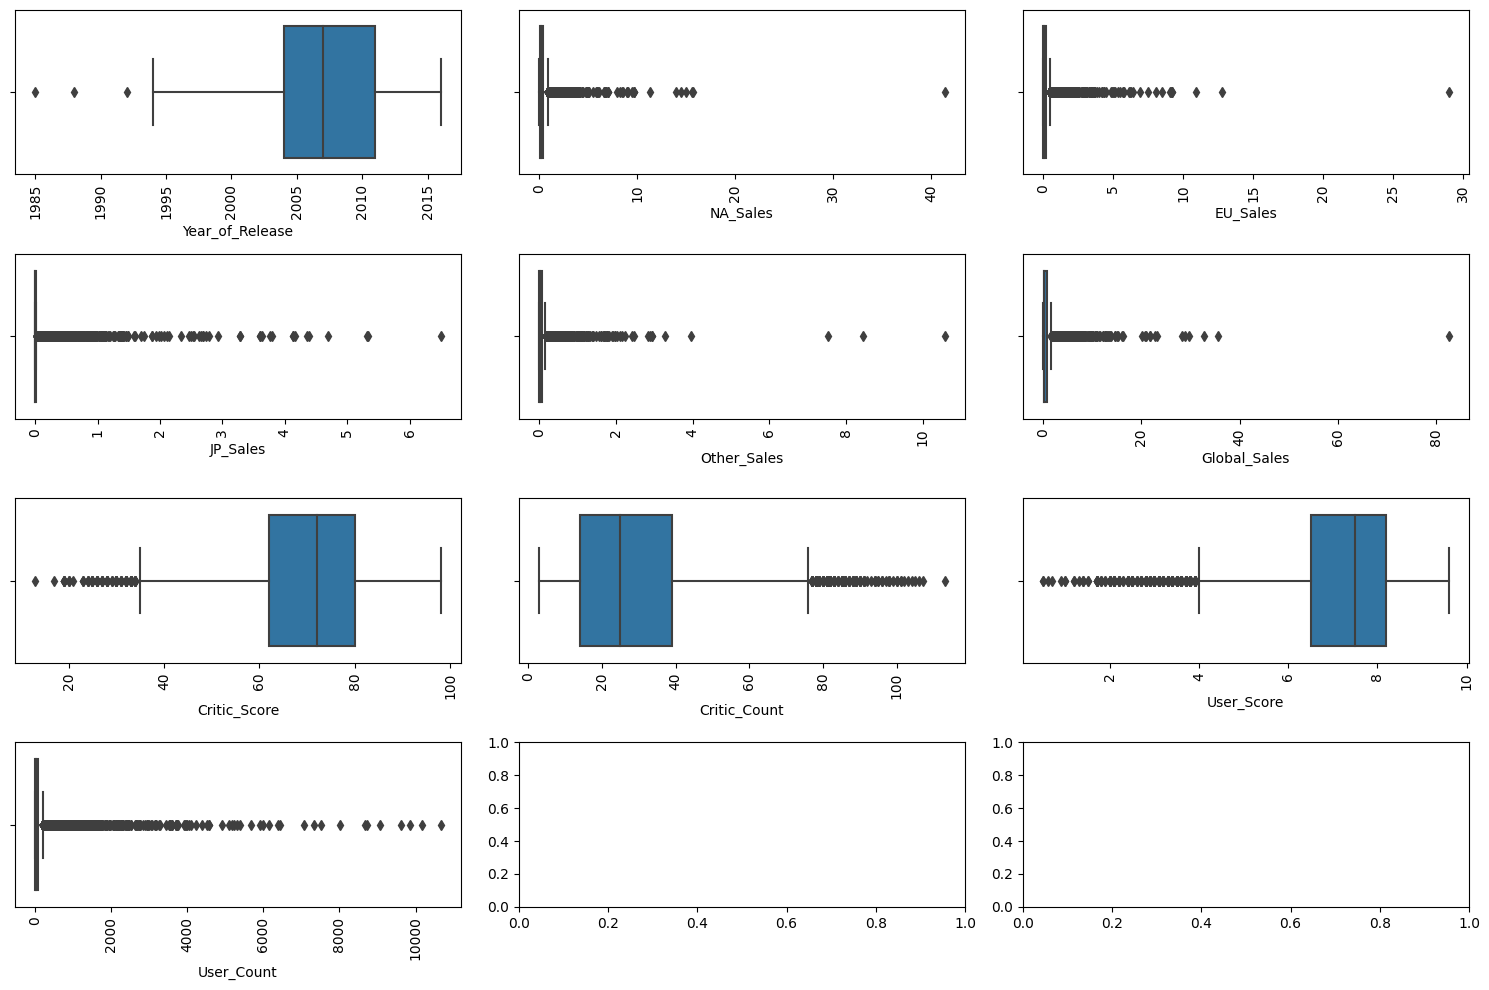

In [45]:
fig,axs = plt.subplots(nrows=4,ncols=3,figsize=(15,10))
axs = axs.flatten()
for i, var in enumerate(var_num):
    sns.boxplot(x=var,data=var_num, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=90)
fig.tight_layout()
plt.show()

In [46]:
df[df['Global_Sales'] > 60]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E


In [47]:
df[df['User_Count'] > 500].head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M


TIENEN SENTIDO YA QUE SON TODO JUEGOS TRIPLE A

### Observamos las variables categoricas con menos etiquetas

In [48]:
var_cat =['Genre','Rating','Platform']

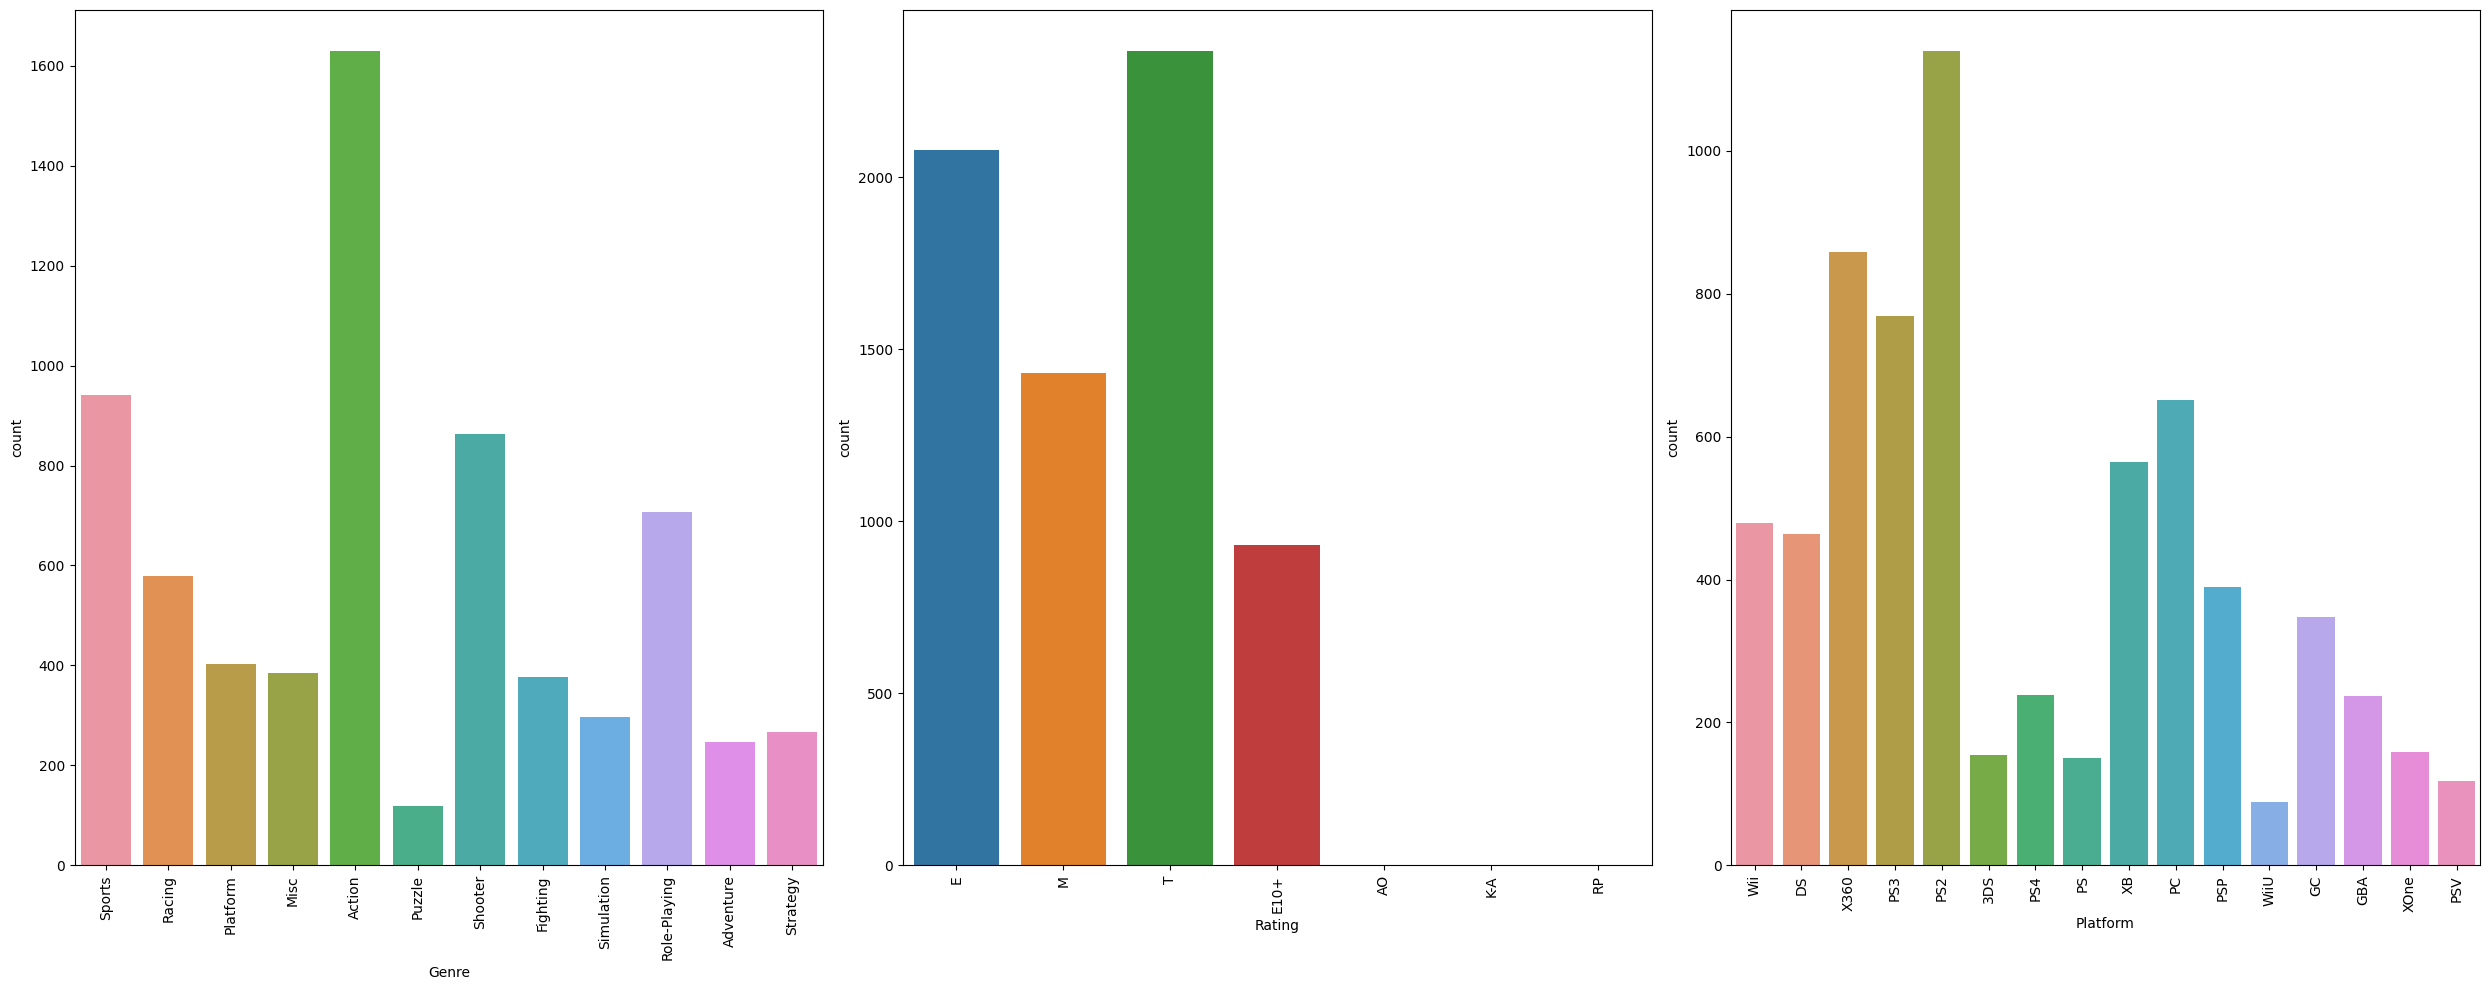

In [49]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(25,10))
axs = axs.flatten()
for i, var in enumerate(var_cat):
    sns.countplot(x=var,data=df, ax=axs[i])
    axs[i].tick_params(axis='x', labelrotation=90)
fig.tight_layout()
plt.show()

#### Vemos que pasa con el Rating

In [50]:
df[df['Rating'] == 'AO']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,Take-Two Interactive,1.26,0.61,0.0,0.09,1.95,93.0,58.0,8.6,118.0,Rockstar North,AO


In [51]:
df[df['Rating'] == 'K-A']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
903,PaRappa The Rapper,PS,1996,Misc,Sony Computer Entertainment,0.26,0.16,1.46,0.03,1.92,92.0,15.0,7.4,48.0,NanaOn-Sha,K-A


In [52]:
df[df['Rating'] == 'RP']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14272,Supreme Ruler: Cold War,PC,2011,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63.0,12.0,6.8,27.0,BattleGoat Studios,RP


##### Comprobamos el rating de estos videojuegos para otra plataforma, con la intención de corregirlo

##### Grand Theft Auto: San Andreas

Definimos una funcion, ya que vamos a repetir este proceso varias veces

In [53]:
def rename(game, plat, new ):
    df.loc[(df['Name'] == game) & (df['Platform'] == plat), 'Rating'] = new
    
    return df[df['Name'] == game]

In [54]:
df[df['Name'] == 'Grand Theft Auto: San Andreas']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9.0,1588.0,Rockstar North,M
875,Grand Theft Auto: San Andreas,XB,2005,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,1.95,93.0,58.0,8.6,118.0,Rockstar North,AO
2115,Grand Theft Auto: San Andreas,PC,2005,Action,Take-Two Interactive,0.00,0.93,0.00,0.04,0.97,93.0,47.0,8.9,1841.0,Rockstar North,M


In [55]:
rename('Grand Theft Auto: San Andreas', 'XB', 'M')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,95.0,80.0,9.0,1588.0,Rockstar North,M
875,Grand Theft Auto: San Andreas,XB,2005,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,1.95,93.0,58.0,8.6,118.0,Rockstar North,M
2115,Grand Theft Auto: San Andreas,PC,2005,Action,Take-Two Interactive,0.00,0.93,0.00,0.04,0.97,93.0,47.0,8.9,1841.0,Rockstar North,M


#### Parapa the Rapper

In [56]:
df[df['Name'] == 'PaRappa The Rapper']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
903,PaRappa The Rapper,PS,1996,Misc,Sony Computer Entertainment,0.26,0.16,1.46,0.03,1.92,92.0,15.0,7.4,48.0,NanaOn-Sha,K-A
9092,PaRappa The Rapper,PSP,2006,Misc,Sony Computer Entertainment,0.11,0.00,0.02,0.02,0.14,67.0,43.0,5.2,16.0,Epics,E


In [57]:
rename('PaRappa The Rapper', 'PS', 'E')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
903,PaRappa The Rapper,PS,1996,Misc,Sony Computer Entertainment,0.26,0.16,1.46,0.03,1.92,92.0,15.0,7.4,48.0,NanaOn-Sha,E
9092,PaRappa The Rapper,PSP,2006,Misc,Sony Computer Entertainment,0.11,0.00,0.02,0.02,0.14,67.0,43.0,5.2,16.0,Epics,E


#### Supreme Ruler: Cold War

In [58]:
df[df['Name'] == 'Supreme Ruler: Cold War']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14272,Supreme Ruler: Cold War,PC,2011,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63.0,12.0,6.8,27.0,BattleGoat Studios,RP


En este caso, es el unico juego con el rating RP (Pendiente de clasificación)

Vamos a buscar en fuentes externas cual fué su Rating (https://www.esrb.org/ratings/31253/supreme-ruler-cold-war/)

Es 'E10+'

In [59]:
rename('Supreme Ruler: Cold War', 'PC', 'E10+')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14272,Supreme Ruler: Cold War,PC,2011,Strategy,Paradox Interactive,0.0,0.03,0.0,0.01,0.03,63.0,12.0,6.8,27.0,BattleGoat Studios,E10+


## Exportamos el CSV listo para trabajar en Power BI

In [60]:
df.to_csv('data_clean.csv')